# 1. COCOapi

Here we will use the `cocoapi` to download images of 3 classes (person, car, biccle) from the COCO dataset.

In [1]:
# Download annotations
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip
!rm annotations_trainval2017.zip
!mkdir COCOdataset2017
!mv annotations COCOdataset2017/

--2020-06-22 20:48:31--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.46.92
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.46.92|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  88.4MB/s    in 2.7s    

2020-06-22 20:48:33 (88.4 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [12]:
# https://github.com/cocodataset/cocoapi/issues/271
from pycocotools.coco import COCO
from tqdm import tqdm_notebook
import urllib.request
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [ ]:
# initialize COCO api for instance annotations
# COCO take the .json annotation file as input
coco = COCO('COCOdataset2017/annotations/instances_train2017.json')

In [9]:
# Get all categories
cats = coco.loadCats(coco.getCatIds())

# Print categories
nms=[cat['name'] for cat in cats]
print(f"{len(cats)} categories: \n{', '.join(nms)}")

80 categories: 
person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, traffic light, fire hydrant, stop sign, parking meter, bench, bird, cat, dog, horse, sheep, cow, elephant, bear, zebra, giraffe, backpack, umbrella, handbag, tie, suitcase, frisbee, skis, snowboard, sports ball, kite, baseball bat, baseball glove, skateboard, surfboard, tennis racket, bottle, wine glass, cup, fork, knife, spoon, bowl, banana, apple, sandwich, orange, broccoli, carrot, hot dog, pizza, donut, cake, chair, couch, potted plant, bed, dining table, toilet, tv, laptop, mouse, remote, keyboard, cell phone, microwave, oven, toaster, sink, refrigerator, book, clock, vase, scissors, teddy bear, hair drier, toothbrush


In [21]:
# Specify classes to download
catIds = coco.getCatIds(catNms=['person', 'car', 'bicycle'])
imgIds = coco.getImgIds(catIds=catIds)
images = coco.loadImgs(imgIds)
print(len(imgIds))
print("imgIds: ", imgIds[0])
print("images: ", images[0])

1101
imgIds:  247808
images:  {'license': 3, 'file_name': '000000247808.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000247808.jpg', 'height': 640, 'width': 378, 'date_captured': '2013-11-23 05:08:51', 'flickr_url': 'http://farm1.staticflickr.com/199/485431395_f55e8bb06d_z.jpg', 'id': 247808}


In [26]:
im_folder = 'COCOdataset2017/images/train/'

# Download images
for im in tqdm_notebook(images):
    im_path = im_folder + im['file_name']
    if not os.path.exists(im_path):
        urllib.request.urlretrieve(im['coco_url'], im_path)

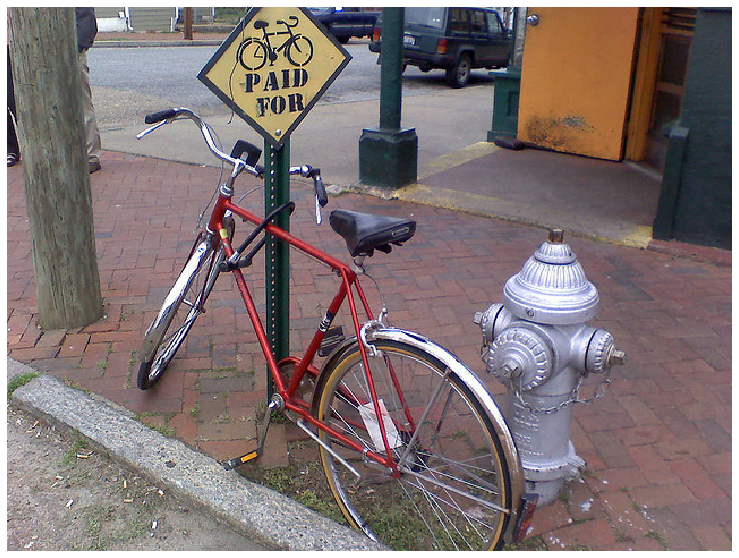

In [38]:
# Display a random image
img = images[np.random.randint(0, len(imgIds))]
im = cv2.imread(im_folder + img['file_name'])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im), plt.axis('off');

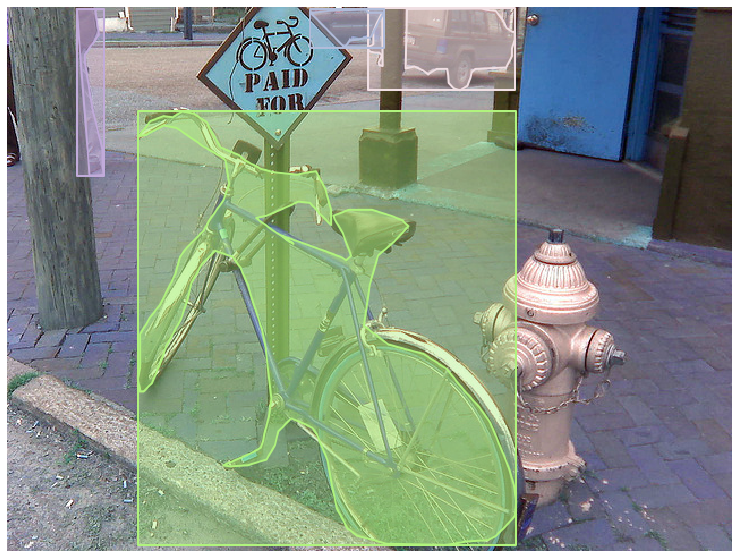

In [41]:
# Load and display instance annotations
plt.imshow(im); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)

In [57]:
# Show bbox labels
[{nms[anns[i]['category_id']]: anns[i]['bbox']} for i in range(len(anns))]

[{'car': [114.83, 91.55, 334.14, 382.76]},
 {'motorcycle': [318.24, 0.62, 129.41, 72.36]},
 {'bicycle': [60.9, 1.03, 23.75, 147.62]},
 {'motorcycle': [266.79, 1.43, 65.08, 33.75]}]

## 2. Gluon
https://gluon-cv.mxnet.io/build/examples_datasets/mscoco.html

In [ ]:
!pip install --upgrade mxnet-cu100 gluoncv

In [ ]:
# Download the full COCO dataset
!wget https://gluon-cv.mxnet.io/_downloads/b6ade342998e03f5eaa0f129ad5eee80/mscoco.py
!python mscoco.py --download-dir ./coco

In [10]:
from gluoncv import data, utils

train_dataset = data.COCODetection(root='./coco', splits=['instances_train2017'])
val_dataset = data.COCODetection(root='./coco', splits=['instances_val2017'])
print('Num of training images:', len(train_dataset))
print('Num of validation images:', len(val_dataset))

loading annotations into memory...
Done (t=18.64s)
creating index...
index created!
loading annotations into memory...
Done (t=0.44s)
creating index...
index created!
Num of training images: 117266
Num of validation images: 4952


Image size (height, width, RGB): (426, 640, 3)
Num of objects: 12
Bounding boxes (x_min, y_min, x_max, y_max):
 [[242.83 172.91 336.82 206.13]
 [372.81 166.45 465.09 203.91]
 [299.46 234.45 401.73 272.74]
 [465.35 227.56 561.81 277.35]
 [389.14 299.64 489.07 341.39]
 [512.73 129.04 605.23 177.07]
 [272.6  181.28 277.37 185.68]
 [542.74 145.33 547.43 150.85]
 [494.   244.59 499.02 247.85]
 [422.95 312.47 428.83 317.11]
 [403.85 177.38 406.13 179.63]
 [335.37 244.98 339.55 248.61]]
Class IDs:
 [[4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


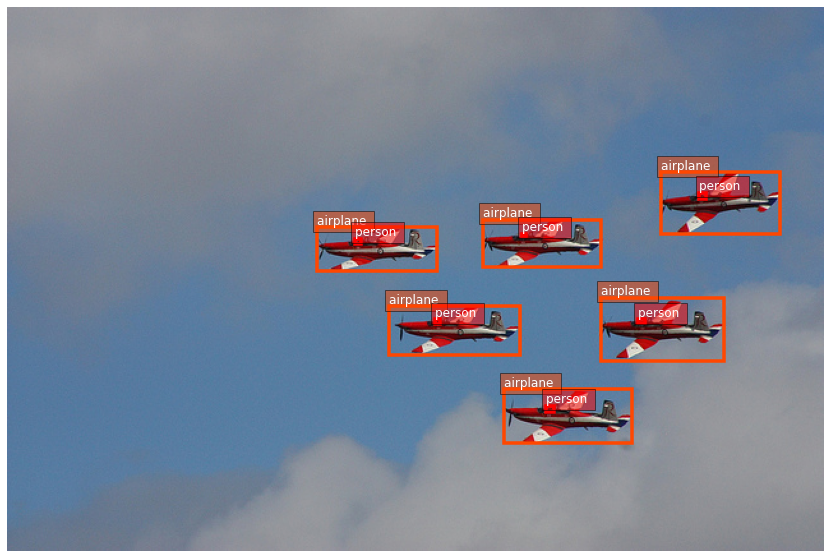

In [20]:
id_ = np.random.randint(0, 117266)
train_image, train_label = train_dataset[id_]
bounding_boxes = train_label[:, :4]
class_ids = train_label[:, 4:5]
print('Image size (height, width, RGB):', train_image.shape)
print('Num of objects:', bounding_boxes.shape[0])
print('Bounding boxes (x_min, y_min, x_max, y_max):\n', bounding_boxes)
print('Class IDs:\n', class_ids)

utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    labels=class_ids, class_names=train_dataset.classes)
plt.axis('off'), plt.show();

## 3. Open Image

In [ ]:
# Training bounding boxes (1.11G)
!wget https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv

# Validating bounding boxes (23.94M)
!wget https://storage.googleapis.com/openimages/v5/validation-annotations-bbox.csv
    
# Testing bounding boxes (73.89M)
!wget https://storage.googleapis.com/openimages/v5/test-annotations-bbox.csv

# Class names of images (11.73K)
!wget https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv

In [27]:
!wget https://raw.githubusercontent.com/spmallick/learnopencv/master/downloadOpenImages/downloadOI.py

--2020-06-23 00:06:43--  https://raw.githubusercontent.com/spmallick/learnopencv/master/downloadOpenImages/downloadOI.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.248.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.248.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3555 (3.5K) [text/plain]
Saving to: ‘downloadOI.py’

downloadOI.py       100%[===================>]   3.47K  --.-KB/s    in 0s      

2020-06-23 00:06:43 (54.7 MB/s) - ‘downloadOI.py’ saved [3555/3555]



In [ ]:
%cd open-images
!python3 downloadOI.py --classes 'Camera' --mode train

/home/ubuntu/skimai_khanh/object_detection/open-images
Class 0 : Car
